### Estimação do trabalho remoto potencial, segundo metodologia do texto de discussão 2738 do IPEA (2022, Góes et al.)

#### Base de dados: 
Para a elaboração do trabalho remoto potencial no Brasil, optou-se por utilizar a PNAD Contínua realizada pelo IBGE, para o período imediatamente anterior à crise provocada pela covid-19 – ou  seja, o quarto trimestre de 2019.

#### Adaptação da metodologia de Neiman e Dingel (2020) para a PNAD Contínua:

Foi realizado a adaptação do código de ocupações para o país, com base na ISCO-08.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
variaveis = [
    'UF',       #Unidade da Federação 
    'V1028',    #Peso do domicílio e das pessoas calibrado
    'V1029',    #Projeção da população
    'posest',   #Domínios de projeção geográfico
    'V2007',    #Sexo
    'V2009',    #Idade
    'V2010',    #Cor ou raça
    'V3009A',   #Curso mais elevado que frequentou anteriormente
    'V4010',    #Código da ocupação
    'V4012',    #Situação no trabalho
    'VD4020'    #Rendimento mensal efetivo de todos os trabalhos
]

In [3]:
#Dados utilizados
cod = pd.read_excel('../Anexos/COD_classificada.xlsx')

pnad = pd.read_parquet('../Dados/pnad_2019_4_filtrado.parquet')

#### Junção da PNAD com o código de ocupações classificado

In [4]:
pnad = pnad.merge(cod, left_on='V4010', right_on='codigo', how='left')

In [5]:
pnad.dropna(subset='V4010', inplace=True) #Exclusão de NAs para aproximação no percentual de potencial remoto

### Estimativa do trabalho remoto potencial por características do indivíduo

#### Estado

In [6]:
potencial_ufs = pd.crosstab(pnad['UF'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_ufs.rename(columns={0:'Não', 1:'Sim'}, inplace=True)
potencial_ufs['Total'] = potencial_ufs.sum(axis=1) #coluna com total
potencial_ufs['Potencial (%)'] = potencial_ufs['Sim'] / potencial_ufs['Total'] * 100 #coluna com potencial
potencial_ufs['Potencial (%)'] = potencial_ufs['Potencial (%)'].round(2) #arredondando para 2 casas decimais
potencial_ufs.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_ufs

teletrabalho,Não,Sim,Total,Potencial (%)
UF,,,,
Distrito Federal,9.509397e+05,4.946052e+05,1.445545e+06,34.22
São Paulo,1.683842e+07,6.067197e+06,2.290561e+07,26.49
Rio de Janeiro,5.735849e+06,1.965053e+06,7.700903e+06,25.52
Rio Grande do Sul,4.453889e+06,1.340216e+06,5.794105e+06,23.13
Santa Catarina,2.886802e+06,8.640782e+05,3.750880e+06,23.04
Paraná,4.382826e+06,1.270367e+06,5.653193e+06,22.47
Espírito Santo,1.509309e+06,4.256033e+05,1.934912e+06,22.00
Mato Grosso do Sul,1.050255e+06,2.815806e+05,1.331836e+06,21.14
Roraima,1.698791e+05,4.519959e+04,2.150787e+05,21.02


In [10]:
#Brasil
print(f"Potencial de trabalho remoto para o Brasil: {potencial_ufs['Sim'].sum() / potencial_ufs['Total'].sum() * 100:.2f}%")
#uma diferença de 0,54% em relação ao cálculo feito pelo IPEA

Potencial de trabalho remoto para o Brasil: 22.16%


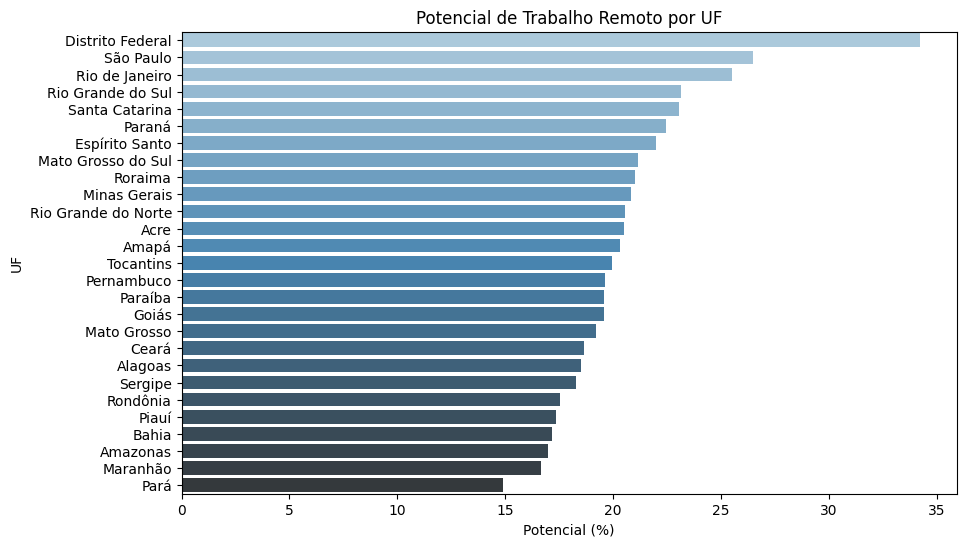

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Potencial (%)', y=potencial_ufs.index, data=potencial_ufs, orient='h', palette='Blues_d')

plt.title('Potencial de Trabalho Remoto por UF')
plt.xlabel('Potencial (%)')
plt.ylabel('UF')

plt.show()

#### Gênero

In [14]:
potencial_genero = pd.crosstab(pnad['V2007'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')

potencial_genero.rename(columns={0:'Não', 1:'Sim'}, inplace=True)

potencial_genero['Total'] = potencial_genero.sum(axis=1) #coluna com total
potencial_genero['Potencial (%)'] = potencial_genero['Sim'] / potencial_genero['Total'] * 100 #coluna com potencial
potencial_genero['Potencial (%)'] = potencial_genero['Potencial (%)'].round(2) #arredondando para 2 casas decimais

potencial_genero.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_genero

teletrabalho,Não,Sim,Total,Potencial (%)
V2007,,,,
Mulher,2.883415e+07,1.215092e+07,4.098507e+07,29.65
Homem,4.510037e+07,8.895383e+06,5.399576e+07,16.47


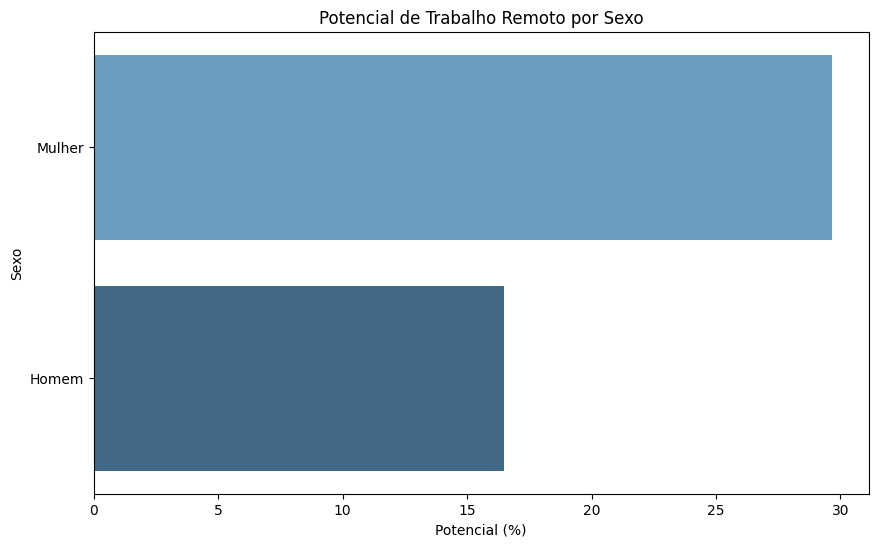

In [15]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Potencial (%)', y=potencial_genero.index, data=potencial_genero, orient='h', palette='Blues_d')

plt.title('Potencial de Trabalho Remoto por Sexo')
plt.xlabel('Potencial (%)')
plt.ylabel('Sexo')

plt.show()


#### Raça

In [12]:
potencial_cor = pd.crosstab(pnad['V2010'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')

potencial_cor.rename(columns={0:'Não', 1:'Sim'}, inplace=True)
potencial_cor['Total'] = potencial_cor.sum(axis=1) #coluna com total
potencial_cor['Potencial (%)'] = potencial_cor['Sim'] / potencial_cor['Total'] * 100 #coluna com potencial
potencial_cor['Potencial (%)'] = potencial_cor['Potencial (%)'].round(2) #arredondando para 2 casas decimais

potencial_cor.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_cor

teletrabalho,Não,Sim,Total,Potencial (%)
V2010,,,,
Amarela,4.421019e+05,2.331716e+05,6.752735e+05,34.53
Ignorado,1.057382e+04,4.823296e+03,1.539711e+04,31.33
Branca,2.986775e+07,1.191686e+07,4.178461e+07,28.52
Parda,3.514143e+07,7.198498e+06,4.233993e+07,17.00
Preta,8.189410e+06,1.636550e+06,9.825960e+06,16.66
Indígena,2.832571e+05,5.639370e+04,3.396508e+05,16.60


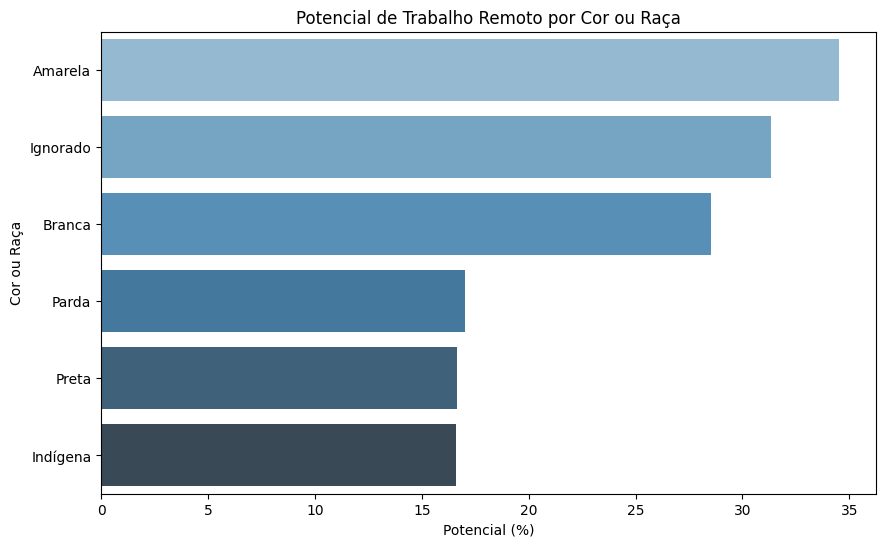

In [13]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Potencial (%)', y=potencial_cor.index, data=potencial_cor, orient='h', palette='Blues_d')
plt.title('Potencial de Trabalho Remoto por Cor ou Raça')
plt.xlabel('Potencial (%)')
plt.ylabel('Cor ou Raça')

plt.show()

#### Escolaridade

In [16]:
potencial_escolaridade = pd.crosstab(pnad['V3009A'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_escolaridade.rename(columns={0:'Não', 1:'Sim'}, inplace=True)

potencial_escolaridade['Total'] = potencial_escolaridade.sum(axis=1) #coluna com total
potencial_escolaridade['Potencial (%)'] = potencial_escolaridade['Sim'] / potencial_escolaridade['Total'] * 100 #coluna com potencial
potencial_escolaridade['Potencial (%)'] = potencial_escolaridade['Potencial (%)'].round(2) #arredondando para 2 casas decimais

potencial_escolaridade.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_escolaridade

teletrabalho,Não,Sim,Total,Potencial (%)
V3009A,,,,
Doutorado,7.695497e+04,2.210389e+05,2.979938e+05,74.18
Mestrado,2.247999e+05,4.784173e+05,7.032172e+05,68.03
Especialização de nível superior,1.681251e+06,3.179695e+06,4.860946e+06,65.41
Superior - graduação,7.395922e+06,7.617912e+06,1.501383e+07,50.74
"Antigo científico, clássico, etc. (médio 2º ciclo)",2.894279e+05,8.314354e+04,3.725715e+05,22.32
Regular do ensino médio ou do 2º grau,3.046401e+07,4.641910e+06,3.510592e+07,13.22
Educação de jovens e adultos (EJA) ou supletivo do 2º grau,1.453450e+06,1.525027e+05,1.605953e+06,9.50
Antigo ginásio (médio 1º ciclo),5.710095e+05,4.601620e+04,6.170257e+05,7.46
Educação de jovens e adultos (EJA) ou supletivo do 1º grau,7.064567e+05,4.073841e+04,7.471951e+05,5.45


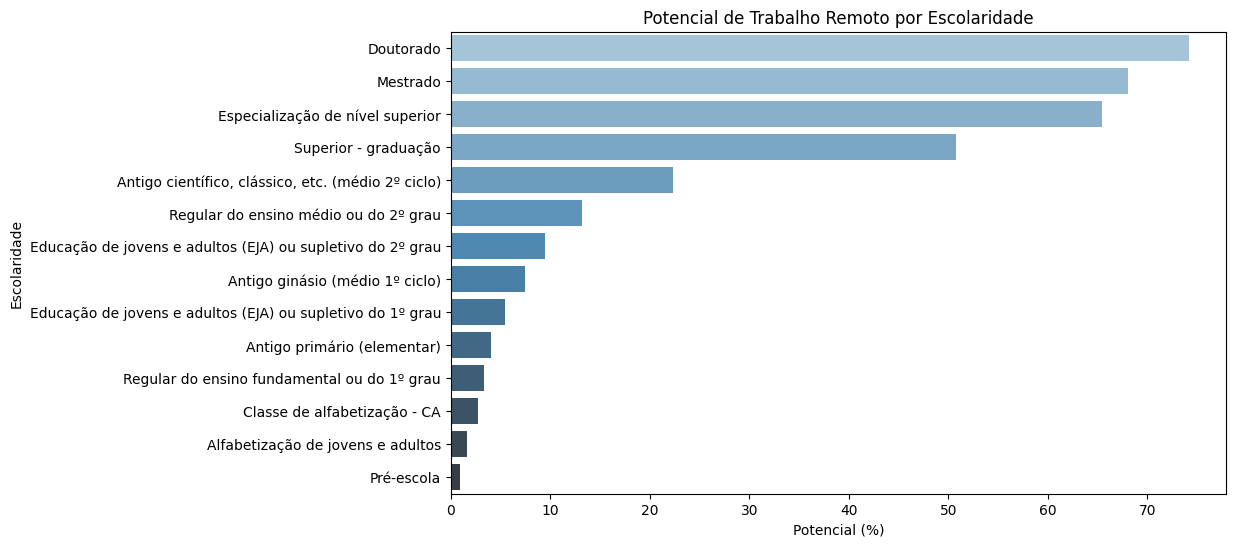

In [19]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Potencial (%)', y=potencial_escolaridade.index, data=potencial_escolaridade, orient='h', palette='Blues_d')

plt.title('Potencial de Trabalho Remoto por Escolaridade')
plt.xlabel('Potencial (%)')
plt.ylabel('Escolaridade')

plt.show()

#### Tipo de trabalho

In [16]:
potencial_trabalho = pd.crosstab(pnad['V4012'], pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')
potencial_trabalho.rename(columns={0:'Não', 1:'Sim'}, inplace=True)

potencial_trabalho['Total'] = potencial_trabalho.sum(axis=1) #coluna com total
potencial_trabalho['Potencial (%)'] = potencial_trabalho['Sim'] / potencial_trabalho['Total'] * 100 #coluna com potencial
potencial_trabalho['Potencial (%)'] = potencial_trabalho['Potencial (%)'].round(2) #arredondando para 2 casas decimais

potencial_trabalho.sort_values(by='Potencial (%)', ascending=False, inplace=True) #ordenando por potencial
potencial_trabalho

teletrabalho,Não,Sim,Total,Potencial (%)
V4012,,,,
Empregado do setor público (inclusive empresas de economia mista),4.677509e+06,5.850505e+06,1.052801e+07,55.57
Empregador,3.161778e+06,1.230480e+06,4.392258e+06,28.01
Empregado do setor privado,3.681269e+07,1.039378e+07,4.720647e+07,22.02
Conta própria,2.149140e+07,2.832155e+06,2.432355e+07,11.64
Trabalhador doméstico,5.545366e+06,6.253404e+05,6.170706e+06,10.13
Trabalhador familiar não remunerado,1.877181e+06,1.140435e+05,1.991224e+06,5.73
"Militar do exército, da marinha, da aeronáutica, da polícia militar ou do corpo de bombeiros militar",3.685977e+05,NaN,3.685977e+05,NaN


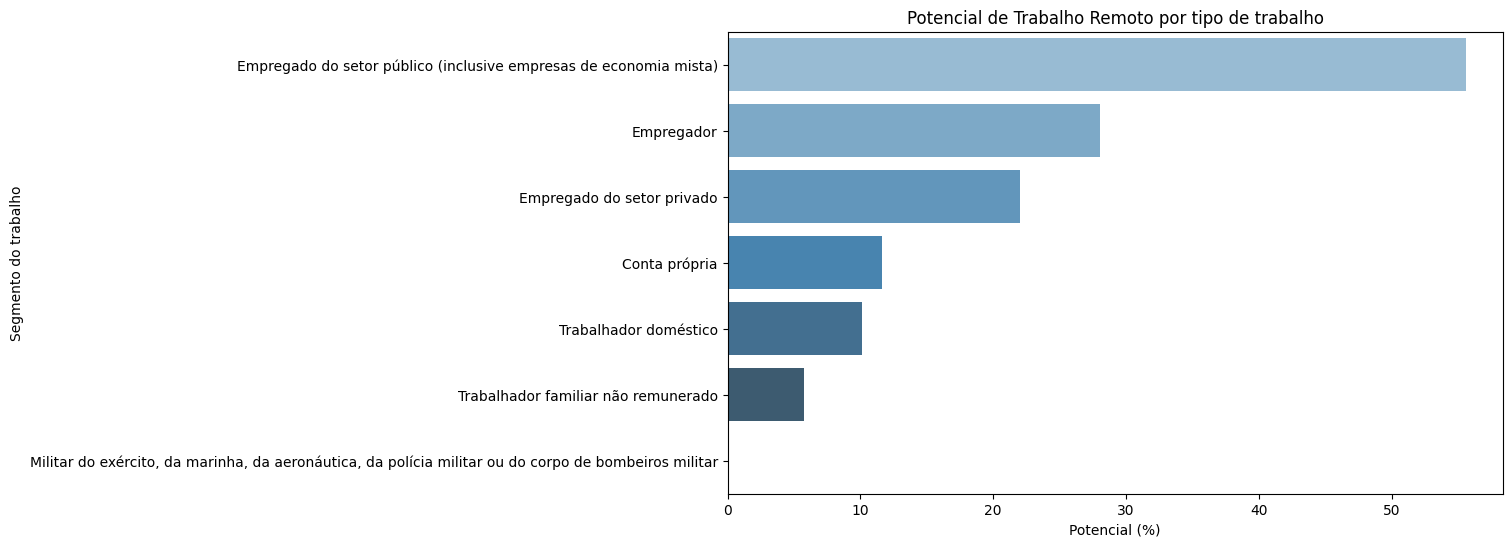

In [18]:
plt.figure(figsize=(10, 6))

sns.barplot(x='Potencial (%)', y=potencial_trabalho.index, data=potencial_trabalho, orient='h', palette='Blues_d')

plt.title('Potencial de Trabalho Remoto por tipo de trabalho')
plt.xlabel('Potencial (%)')
plt.ylabel('Segmento do trabalho')

plt.show()

#### Potencial segmentado para todos os grupos

In [21]:
index = [
    pnad['UF'],
    pnad['V4012'], #Tipo de trabalho
    pnad['V3009A'], #Curso mais elevado que frequentou anteriormente
    pnad['V2010'], #Cor ou raça
    pnad['V2007'], #Sexo
]

In [24]:
pd.crosstab(index, pnad['teletrabalho'], values=pnad['V1028'], aggfunc='sum')

teletrabalho                                                                                                 0.0  \
UF        V4012                               V3009A                                V2010    V2007                 
Acre      Conta própria                       Alfabetização de jovens e adultos     Branca   Homem     53.412216   
                                                                                             Mulher    54.525424   
                                                                                    Indígena Homem     22.047858   
                                                                                    Parda    Homem    437.331592   
                                                                                             Mulher    60.129515   
...                                                                                                          ...   
Tocantins Trabalhador familiar não remunerado Regular do ensino médio ou do 2º grau Preta    Mulher   471.128857   
                                              Superior - graduação                  Branca   Homem    265.779424   
                                                                                             Mulher  1080.460802   
                                                                                    Parda    Homem    203.316698   
                                                                                             Mulher  1429.752987   

teletrabalho                                                                                                1.0  
UF        V4012                               V3009A                                V2010    V2007               
Acre      Conta própria                       Alfabetização de jovens e adultos     Branca   Homem          NaN  
                                                                                             Mulher         NaN  
                                                                                    Indígena Homem          NaN  
                                                                                    Parda    Homem          NaN  
                                                                                             Mulher         NaN  
...                                                                                                         ...  
Tocantins Trabalhador familiar não remunerado Regular do ensino médio ou do 2º grau Preta    Mulher         NaN  
                                              Superior - graduação                  Branca   Homem          NaN  
                                                                                             Mulher  268.340192  
                                                                                    Parda    Homem          NaN  
                                                                                             Mulher         NaN  

[8125 rows x 2 columns]